# Breast Cancer Classification using Support Vector Classifier and Multinomial Naive Bayes

## Data Set
A popular [dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)) in machine learning literature, features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

These are the features (feature 2 is our dependent variable):

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)
- 3-32) Features are computed for each cell nucleus.

 For example:


- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

# EDA

**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("data/breast-cancer-wisconsin.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**Shape of the DataFrame**

In [2]:
df.shape

(569, 33)

**Feature Names**

In [3]:
columns_names = df.columns.tolist()
print(columns_names)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


**Let's check for any null values in the DataSet**

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Let's also check the features and data types**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Remove unnecessary columns (like 'id' and 'Unnamed: 32')**

In [6]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Let's plot the Distributions of the Independent Features**

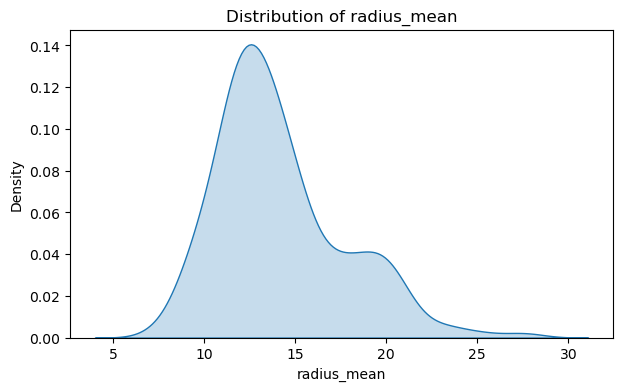

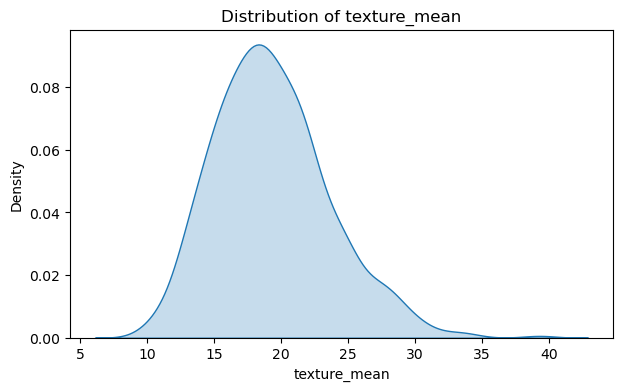

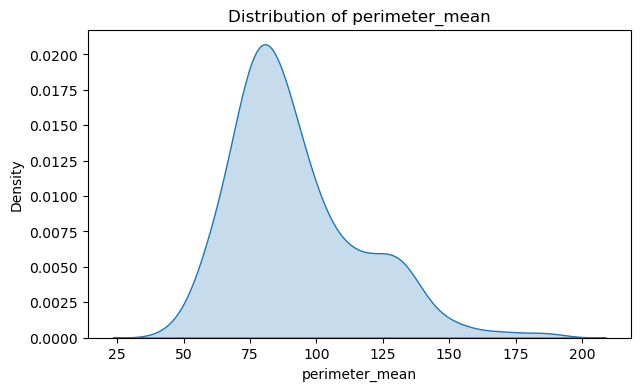

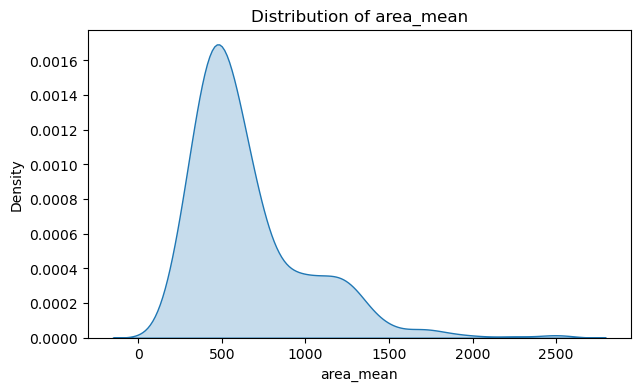

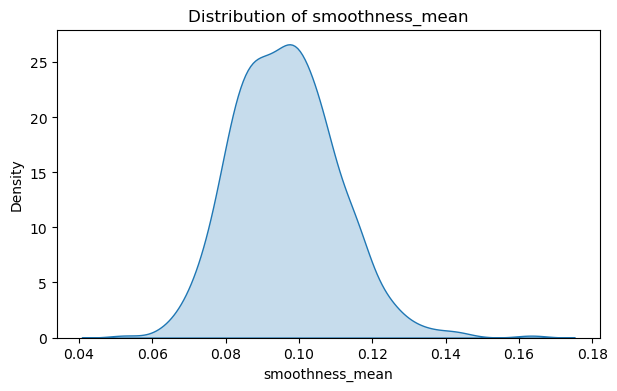

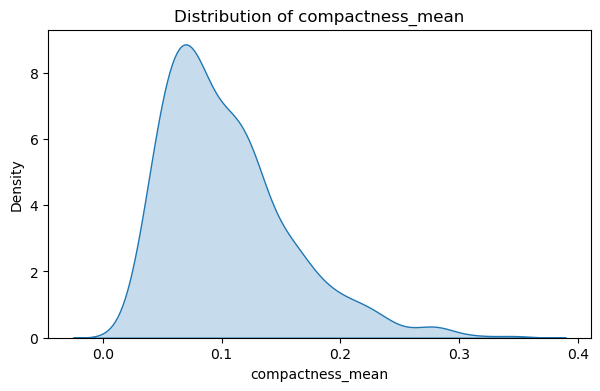

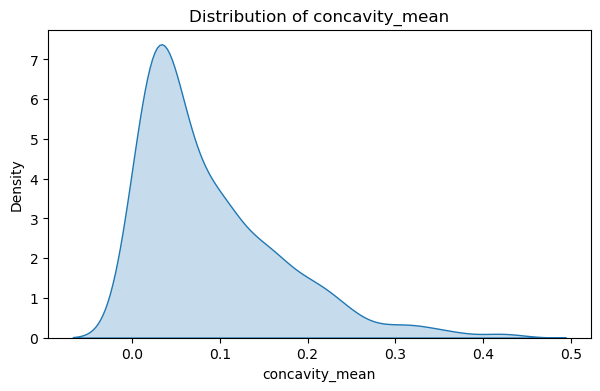

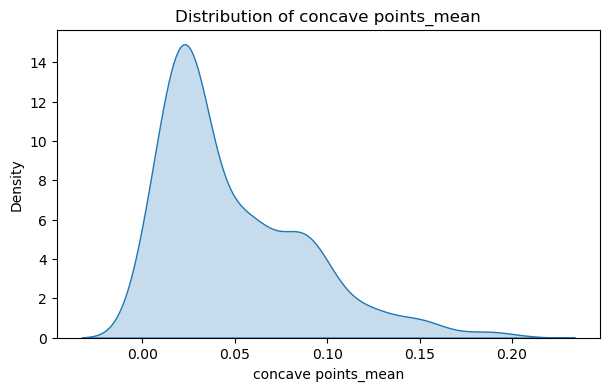

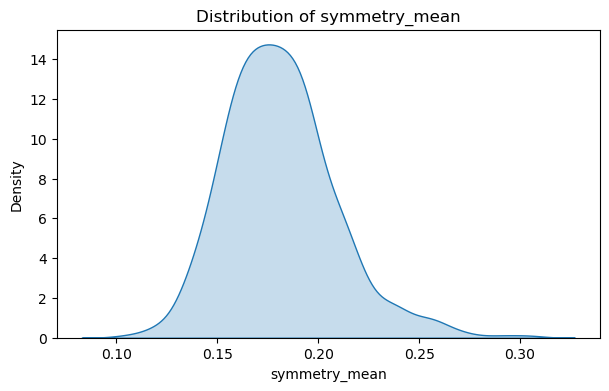

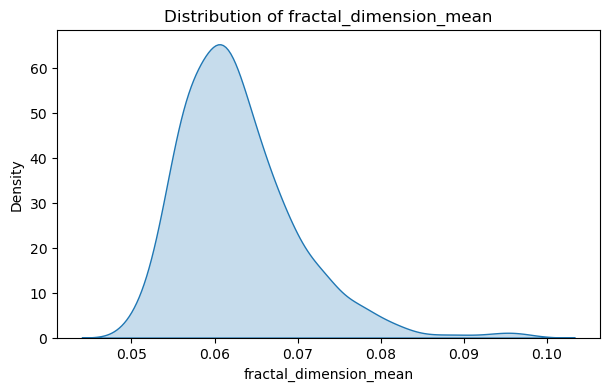

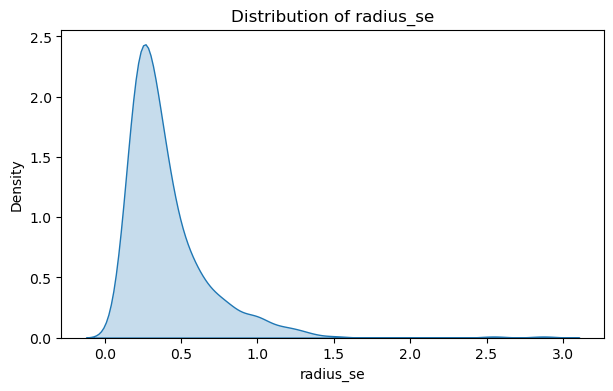

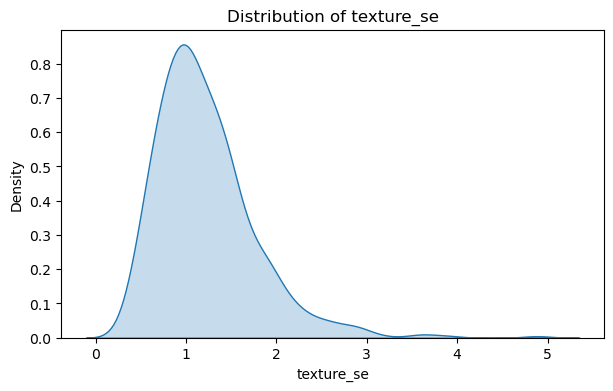

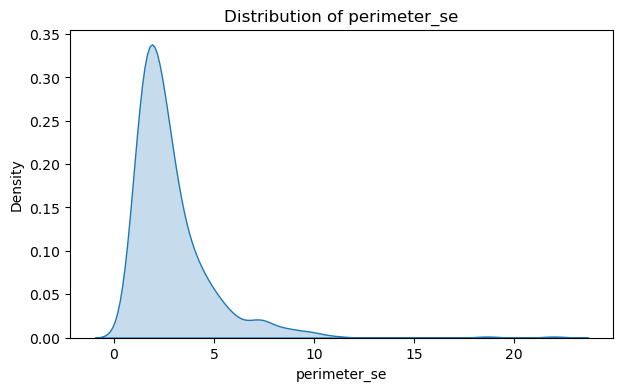

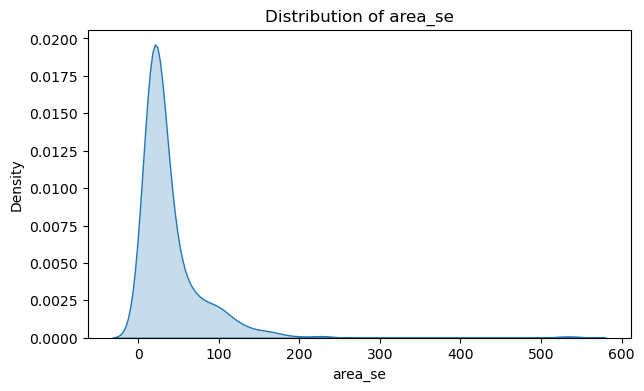

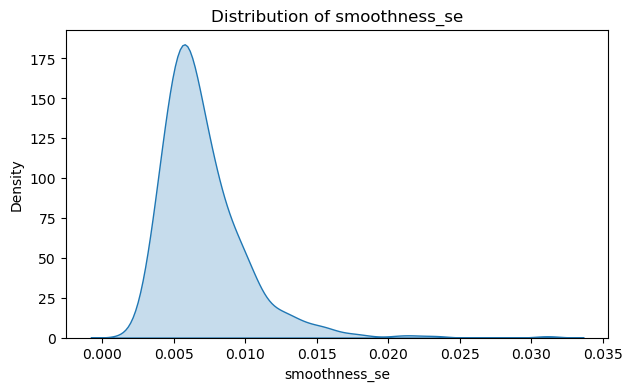

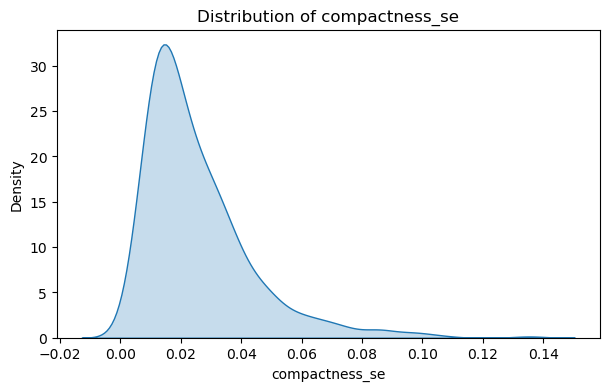

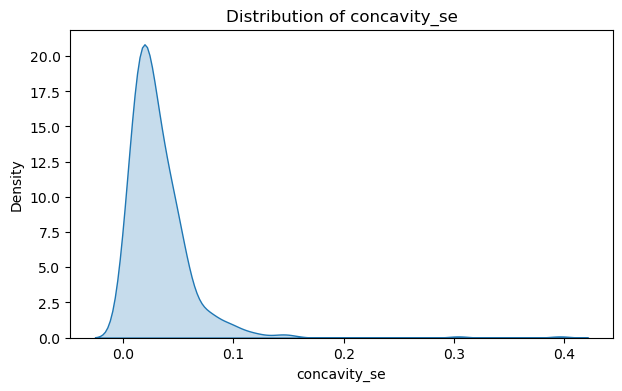

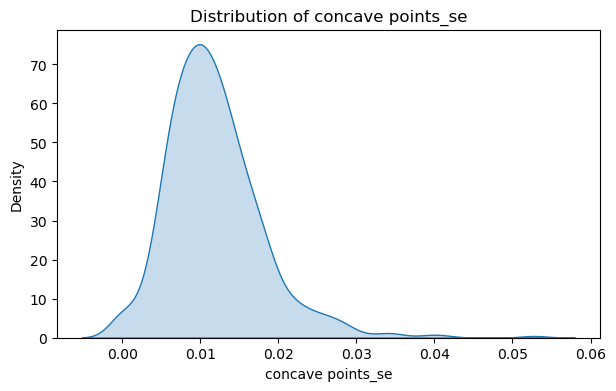

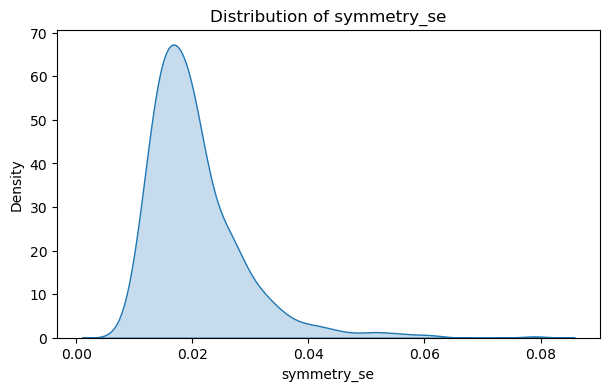

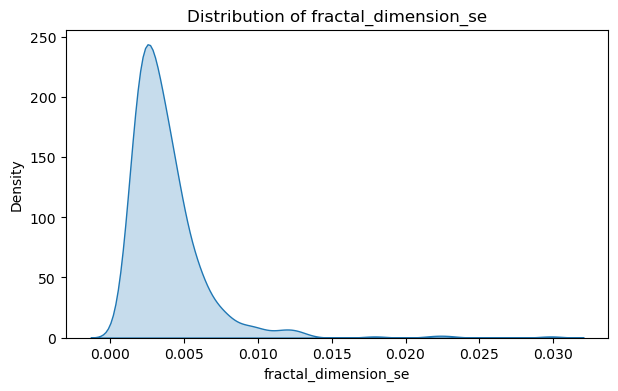

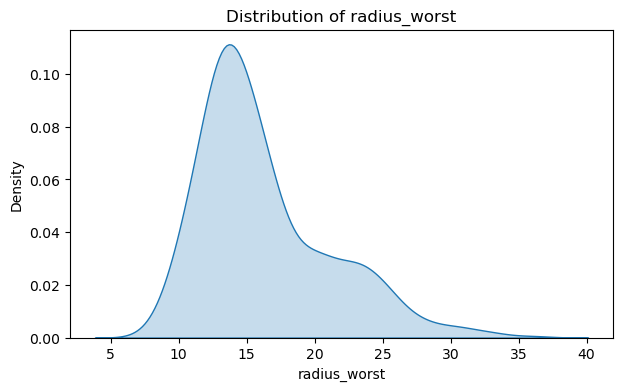

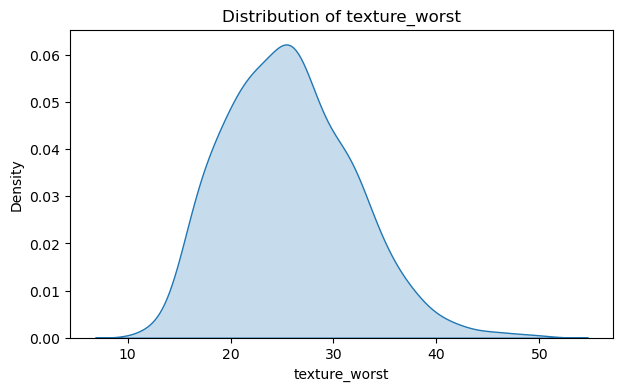

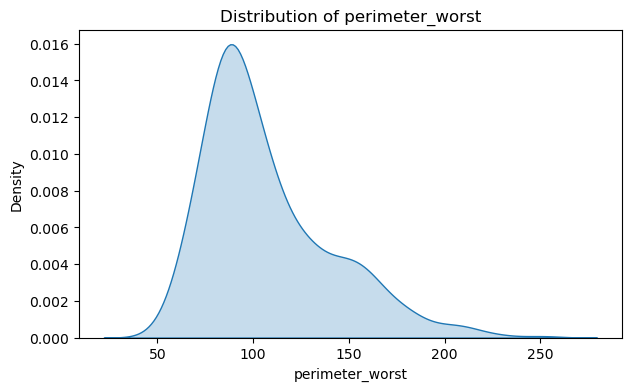

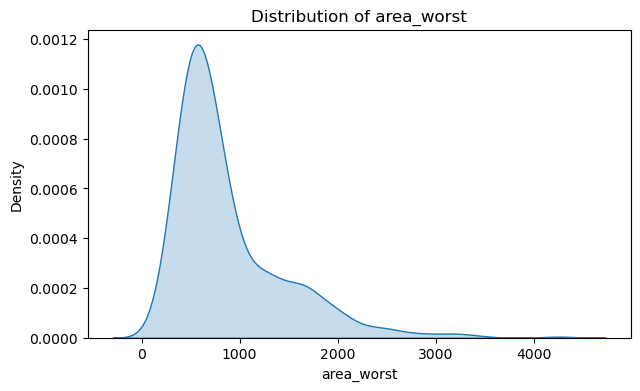

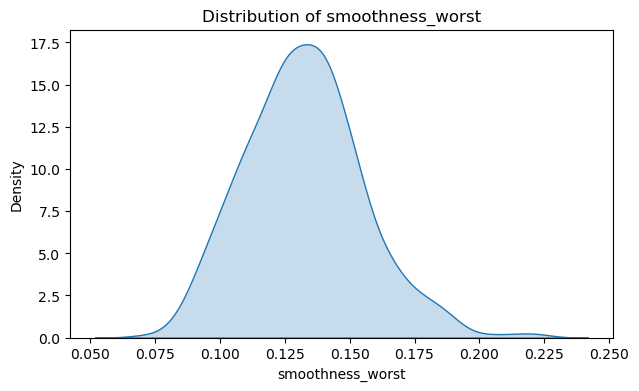

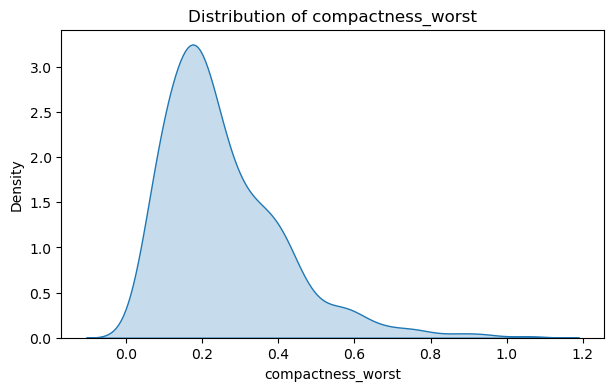

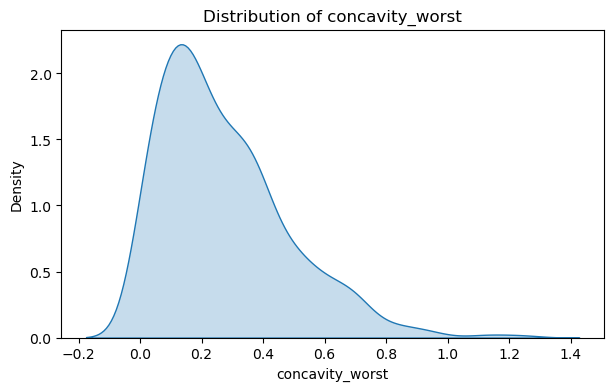

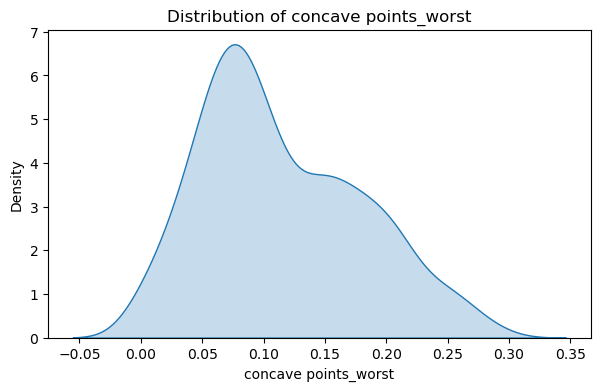

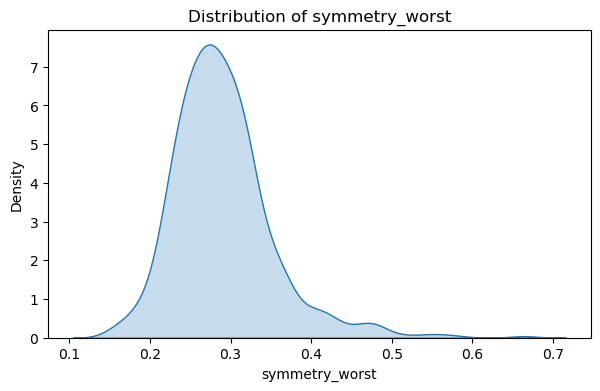

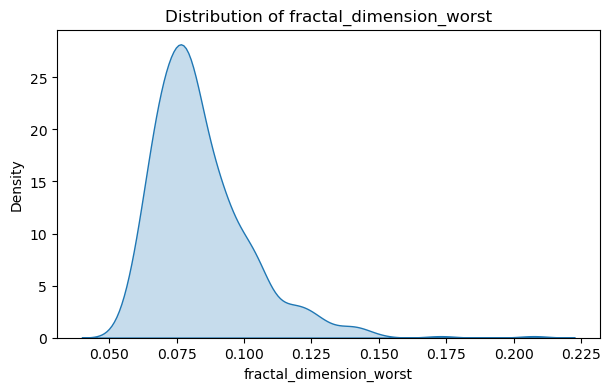

In [7]:
features_to_plot = df.drop('diagnosis', axis=1)

for feature in features_to_plot:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

**Let's check if the data is balanced or not**

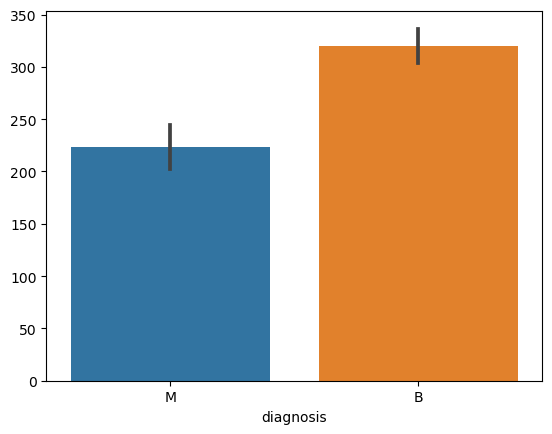

In [8]:
sns.barplot(x = "diagnosis", y = df.diagnosis.index, data= df);

**So it's not balanced, but not super-imbalanced, either**

**Plot the heatmap to check the correlations with target variable, let's first Convert the 'diagnosis' column to a numerical format**

In [9]:
# Malignant = 1 (M), Benign = 0 (B)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


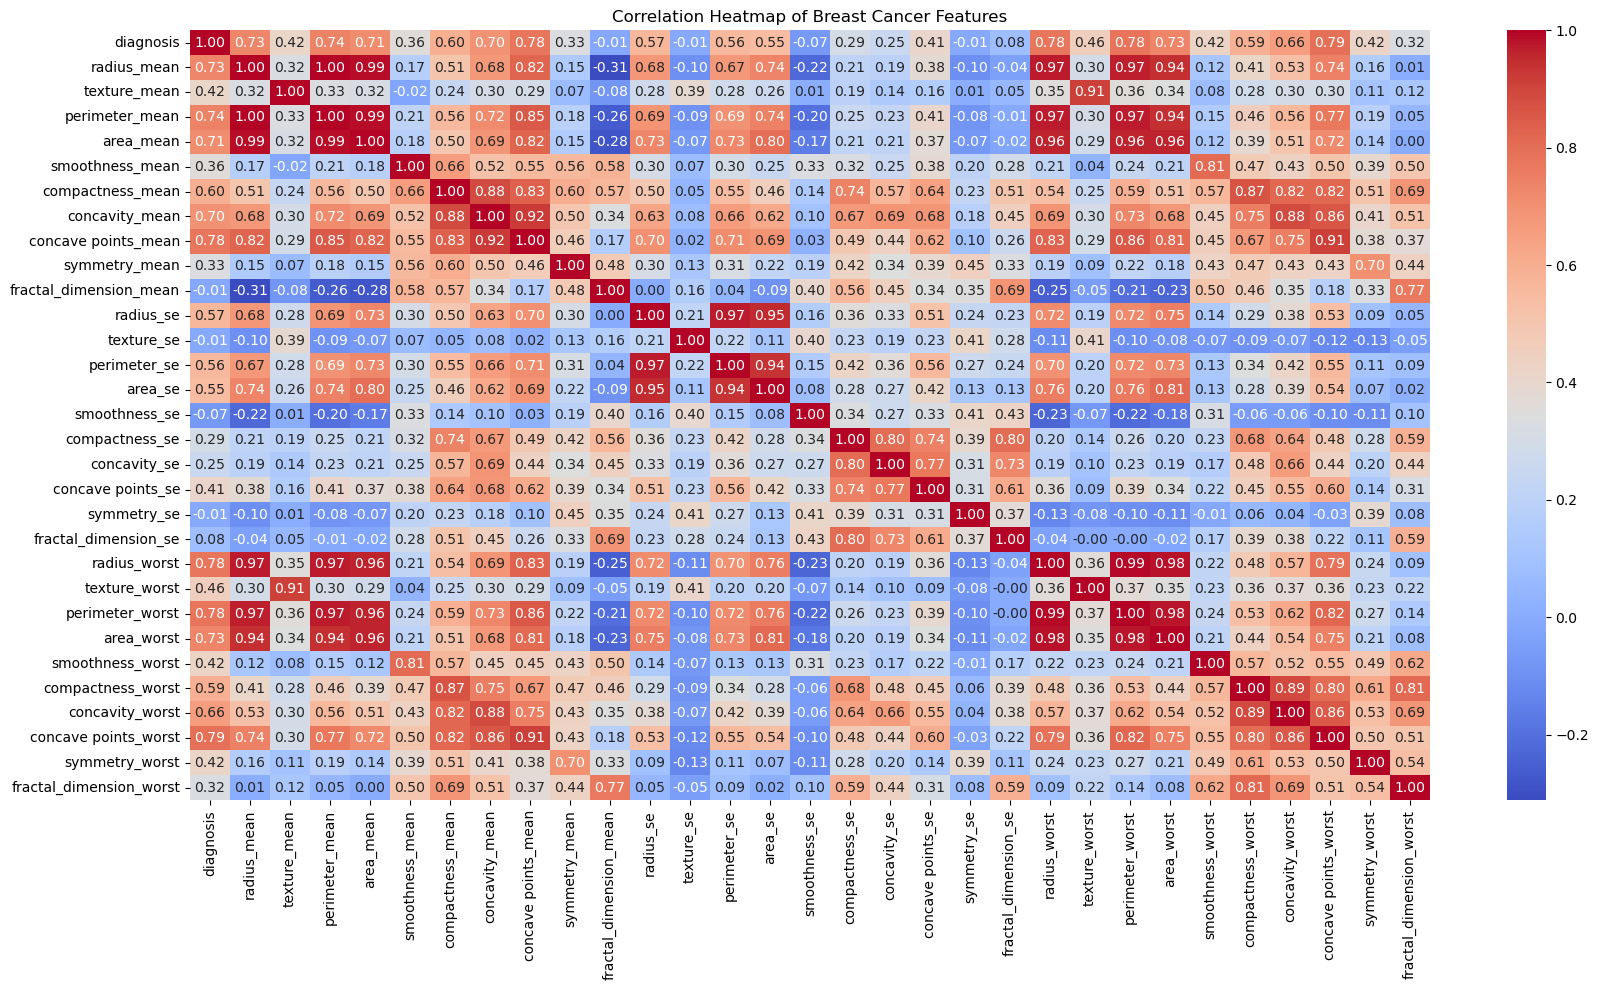

In [10]:
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

**Based on the correlation criterion with a threshold of 0.5 with the target variable, the following features have been selected for inclusion in the model**

In [11]:
correlation_matrix = df.corr()

# features with a correlation above 0.5 with the diagnosis variable
correlated_features = correlation_matrix.index[correlation_matrix["diagnosis"].abs() > 0.5].tolist()

# Ensuring 'diagnosis' itself is not included in the list
correlated_features.remove('diagnosis') if 'diagnosis' in correlated_features else correlated_features

# Printing the features
print(correlated_features)

['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


1. radius_mean
2. perimeter_mean
3. area_mean
4. compactness_mean
5. concavity_mean
6. concave points_mean
7. radius_se
8. perimeter_se
9. area_se
10. radius_worst
11. perimeter_worst
12. area_worst
13. compactness_worst
14. concavity_worst
15. concave points_worst

# Support Vector Classifier Models

**Let's start with SVC model with deafult hyperparameters with all features included for training the model and see the accuaracy of the model**

**The StandardScaler is used to standardize the features**

**Also, splitted the data for training(80%) and testing(20%).**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Selecting the specified features and the target variable
features = df.drop(['diagnosis'],axis=1)
target = df['diagnosis']

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training (80%) and testing (20%) sets
X_trainSVC, X_testSVC, y_trainSVC, y_testSVC = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Displaying the sizes of the training and testing sets
(X_trainSVC.shape, X_testSVC.shape, y_trainSVC.shape, y_testSVC.shape)

((455, 30), (114, 30), (455,), (114,))

In [13]:
# Training the Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_trainSVC, y_trainSVC)

# Predicting the test set results
y_predSVC = svc_model.predict(X_testSVC)

Accuracy: 97.36842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



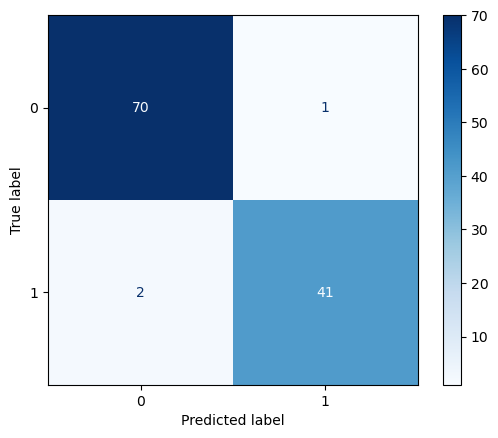

In [14]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

# Evaluating the model
print("Accuracy:", accuracy_score(y_testSVC,y_predSVC)*100)
print(classification_report(y_testSVC, y_predSVC))
ConfusionMatrixDisplay.from_predictions(y_testSVC, y_predSVC, cmap = 'Blues')

**Accuracy: 97.36**

The confusion matrix is to visualise the accuracy calculated in more detailed way.

Accuracy is calculated as follows:

Accuracy = TP+TN/(TP+FP+FN+TN)

TP = True Positive

TN = True Negative

FP = False Positive

FN = False Negative

True negatives (correctly predicted benign): 70

False positives (benign cases incorrectly predicted as malignant): 1

False negatives (malignant cases incorrectly predicted as benign): 2

True positives (correctly predicted malignant): 41

The accuracy of a model will be more if FP & FN numbers are low. As low as 0 can give a perfect 100% accuracy but which is impossible in the real world data

**Now, let's consider the above choosen 15 features which are correlated above 0.5 to the target variable also tune the hyperparameters by using GridSearchCV and check the model performance**

In [15]:
# Selecting the specified features and the target variable
features = df[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 
                         'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 
                         'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 
                         'compactness_worst', 'concavity_worst', 'concave points_worst']]
target = df['diagnosis']

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Splitting the dataset into training (80%) and testing (20%) sets
X_trainSVC, X_testSVC, y_trainSVC, y_testSVC = train_test_split(features_scaled_df, target, test_size=0.2, random_state=42)

# Displaying the sizes of the training and testing sets
(X_trainSVC.shape, X_testSVC.shape, y_trainSVC.shape, y_testSVC.shape)

((455, 15), (114, 15), (455,), (114,))

**Let's find the best SVC parameters with GridSearchCV**

In [16]:
from sklearn.model_selection import GridSearchCV

svc = SVC()
param_grid_svc = {
    'C': [0.1, 1, 10, 100],  # Values for C
    'gamma': [1, 0.1, 0.01, 0.001],  # Values for gamma
    'kernel': ['rbf', 'linear']  # Different kernel types
}
grid_search_svc = GridSearchCV(svc, param_grid_svc, refit=True, verbose=2, cv=5)  # 5-fold cross-validation

# Performing grid search with scaled features
grid_search_svc.fit(X_trainSVC, y_trainSVC)

# Best parameters and best score for SVC
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

best_params_svc, best_score_svc

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9538461538461538)

**({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9538461538461538)**

**SVC model with selected features and tuned hyperparameters**

In [17]:
# Training the Support Vector Classifier
svc_model = SVC(C=10, gamma=0.1, kernel='rbf')
svc_model.fit(X_trainSVC, y_trainSVC)

# Predicting the test set results
y_predSVC = svc_model.predict(X_testSVC)

**Results of the Model**

Accuracy: 97.36842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



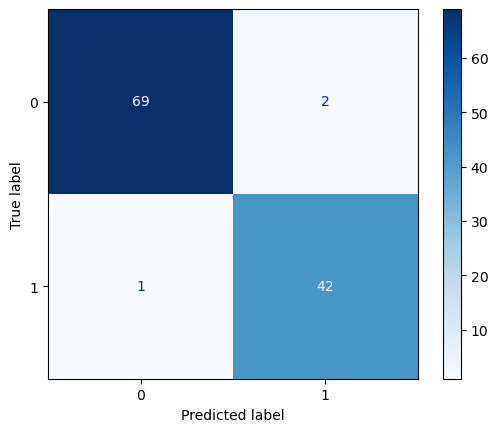

In [18]:
print("Accuracy:", accuracy_score(y_testSVC,y_predSVC)*100)
print(classification_report(y_testSVC, y_predSVC))
ConfusionMatrixDisplay.from_predictions(y_testSVC, y_predSVC, cmap = 'Blues')

**Accuracy: 97.36**

True negatives (correctly predicted benign): 69

False positives (benign cases incorrectly predicted as malignant): 2

False negatives (malignant cases incorrectly predicted as benign): 1

True positives (correctly predicted malignant): 42

**Accuracy is same as the default SVC model but there are changes in the predictions that can bee seen in confusion matrix**

**Now, let's model the SVC with all the features  and check the model performance**

In [19]:
# Selecting the specified features and the target variable
features = df.drop(['diagnosis'],axis=1)
target = df['diagnosis']

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Displaying the sizes of the training and testing sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((455, 30), (114, 30), (455,), (114,))

**Let's find the best SVC parameters with GridSearchCV**

In [20]:
svc = SVC()
param_grid_svc = {
    'C': [0.1, 1, 10, 100],  # Values for C
    'gamma': [1, 0.1, 0.01, 0.001],  # Values for gamma
    'kernel': ['rbf', 'linear']  # Different kernel types
}
grid_search_svc = GridSearchCV(svc, param_grid_svc, refit=True, verbose=2, cv=5)  # 5-fold cross-validation

# Performing grid search with scaled features
grid_search_svc.fit(X_train, y_train)

# Best parameters and best score for SVC
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

best_params_svc, best_score_svc

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

({'C': 0.1, 'gamma': 1, 'kernel': 'linear'}, 0.9758241758241759)

**({'C': 0.1, 'gamma': 1, 'kernel': 'linear'}, 0.9758241758241759)**

**SVC model with all features and tuned hyperparameters**

In [21]:
# Training the Support Vector Classifier
svc_model = SVC(C=0.1, kernel='linear')
svc_model.fit(X_train, y_train)
# Predicting the test set results
y_pred = svc_model.predict(X_test)

**Results of the Model**

Accuracy: 98.24561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



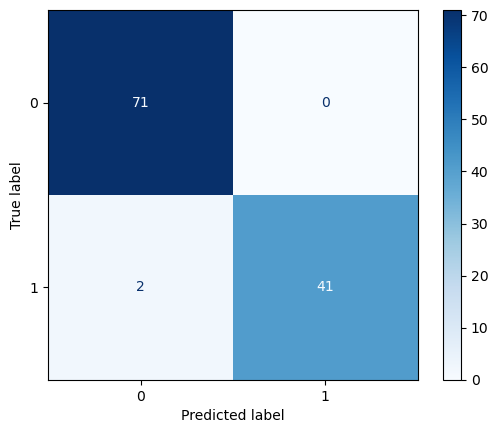

In [22]:
print("Accuracy:", accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

**Accuracy: 98.24**

True negatives (correctly predicted benign): 71

False positives (benign cases incorrectly predicted as malignant): 0

False negatives (malignant cases incorrectly predicted as benign): 2

True positives (correctly predicted malignant): 41

## Model accuracies of Support Vector Classifier

**Support Vector Classifier (SVC) with all features(30) and default hyperparameters: 97.3% accuracy.**

**Support Vector Classifier (SVC) with selected features(15) and tuned hyperparameters: 97.3% accuracy.**

**Support Vector Classifier (SVC) with all features(30) and tuned hyperparameters: 98.2% accuracy.**

# Multinomial Naive Bayes Models

**Let's start with MNB model with deafult hyperparameters with all features included for training the model and see the accuaracy of the model**

In [23]:
from sklearn.naive_bayes import MultinomialNB

# Separate features and target variable
Features = df.drop('diagnosis', axis=1)
target = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 93.85964912280701
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



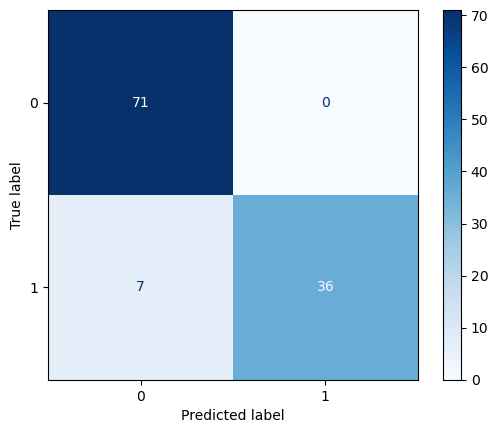

In [24]:
print("Accuracy:", accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

**Accuracy: 93.85**

True negatives (correctly predicted benign): 71

False positives (benign cases incorrectly predicted as malignant): 0

False negatives (malignant cases incorrectly predicted as benign): 7

True positives (correctly predicted malignant): 36

**Now, let's consider the above choosen 15 features which are correlated above 0.5 to the target variable also tune the hyperparameter "alpha" by using GridSearchCV and check the model performance**

In [25]:
Features = df[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 
                         'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 
                         'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 
                         'compactness_worst', 'concavity_worst', 'concave points_worst']]
target = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size=0.2, random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'alpha': 100.0}, 0.9098901098901099)

In [27]:
# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB(alpha= 0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 94.73684210526315
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



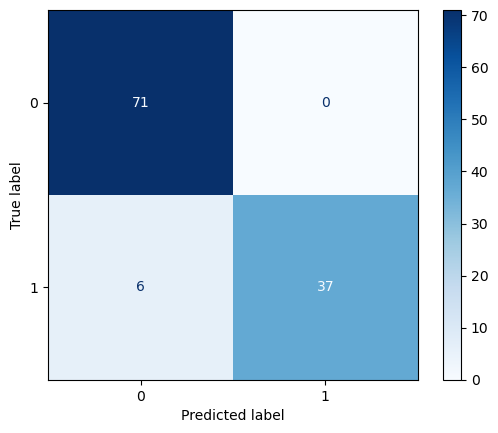

In [28]:
print("Accuracy:", accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

**Accuracy: 94.73**

True negatives (correctly predicted benign): 71

False positives (benign cases incorrectly predicted as malignant): 0

False negatives (malignant cases incorrectly predicted as benign): 6

True positives (correctly predicted malignant): 37

**Now, let's consider all the features with tuned hyperparameter "alpha" by using GridSearchCV and check the model performance**

In [29]:
Features = df.drop('diagnosis', axis=1)
target = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size=0.2, random_state=42)

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'alpha': 0.01}, 0.8835164835164836)

In [31]:
model = MultinomialNB(alpha= 0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 93.85964912280701
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



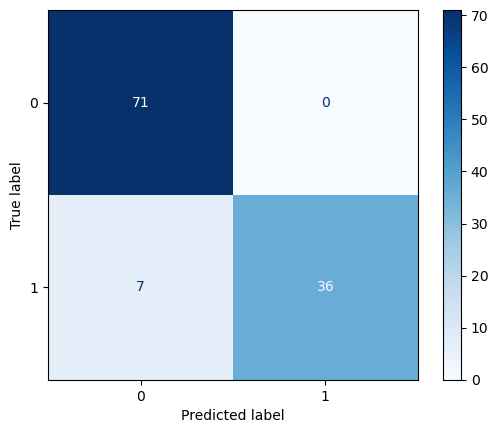

In [32]:
print("Accuracy:", accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

**Accuracy: 93.85964912280701**

True negatives (correctly predicted benign): 71

False positives (benign cases incorrectly predicted as malignant): 0

False negatives (malignant cases incorrectly predicted as benign): 7

True positives (correctly predicted malignant): 36

## Model accuracies of Multinomial Naive Bayes

**Multinomial Naive Bayes (MNB) with all features(30) and default hyperparameters: 93.8% accuracy.**

**Multinomial Naive Bayes (MNB) with selected features(15) and tuned hyperparameters: 94.7% accuracy.**

**Multinomial Naive Bayes (MNB) with all features(30) and tuned hyperparameters: 93.8% accuracy.**

# Model Perforamance Analysis

**Comparison of Support Vector Classifier Model Performances**

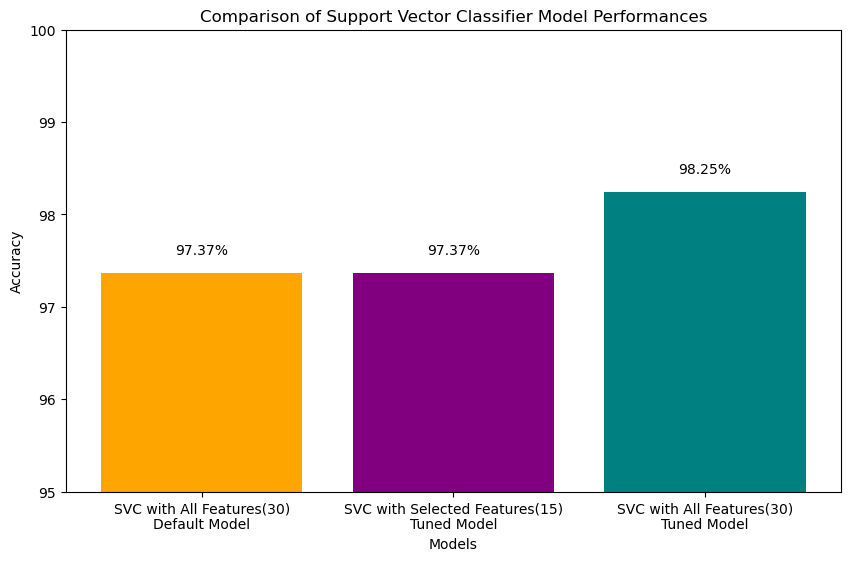

In [33]:
svc_models = [
    'SVC with All Features(30)\nDefault Model',
    'SVC with Selected Features(15)\nTuned Model',
    'SVC with All Features(30)\nTuned Model'
]
svc_accuracies = [97.36842105263158, 97.36842105263158, 98.24561403508771]

plt.figure(figsize=(10, 6))
plt.bar(svc_models, svc_accuracies, color=['orange', 'purple', 'teal'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Support Vector Classifier Model Performances')
plt.ylim(95, 100)

for i in range(len(svc_accuracies)):
    plt.text(i, svc_accuracies[i] + 0.2, f'{svc_accuracies[i]:.2f}%', ha = 'center')

plt.show()

**Comparison of Multinomial Naive Bayes Model Performances**

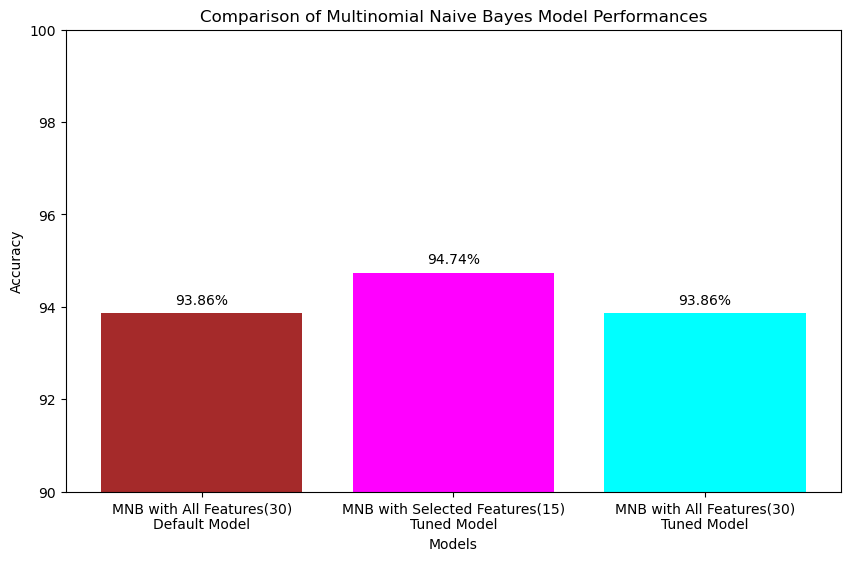

In [34]:
mnb_models = [
    'MNB with All Features(30)\nDefault Model',
    'MNB with Selected Features(15)\nTuned Model',
    'MNB with All Features(30)\nTuned Model'
]
mnb_accuracies = [93.85964912280701, 94.73684210526315, 93.85964912280701]

plt.figure(figsize=(10, 6))
plt.bar(mnb_models, mnb_accuracies, color=['brown', 'magenta', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Multinomial Naive Bayes Model Performances')
plt.ylim(90, 100)

for i in range(len(mnb_accuracies)):
    plt.text(i, mnb_accuracies[i] + 0.2, f'{mnb_accuracies[i]:.2f}%', ha = 'center')

plt.show()

## Best models with highest accuracies

SVC: The SVC model with all features and tuned hyperparameters (C=0.1, kernel='linear') is the best performer among the SVC models, with the highest accuracy of 98.25%.

MNB: The MNB model with selected features and tuned hyperparameters (alpha=0.01) is the best performer among the MNB models, with an accuracy of 94.74%.